<h1><b><i>Principal Component Analysis</i> (<i>PCA</i>) </b></h1>

<p>Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>ανάλυσης σε κύριες συνιστώσες</i></b> (<b><i>Principal Component Analysis</i></b>, <b><i>PCA</i></b>), υλοποιημένο σύμφωνα με τη <b><i>μέθοδο συνδιακύμανσης</i></b> (<b><i>covariance method</i></b>). Για να κατανοήσετε τη χρησιμότητα της μεθόδου θα εκπαιδεύσετε και θα αξιολογήσετε την ακρίβεια ενός μοντέλου <b><i>logistic regression</i></b> για ένα dataset πριν και μετά την εφαρμογή του αλγορίθμου <b><i>PCA</i></b>. Περισσότερες πληροφορίες για τη μέθοδο αυτή μπορείτε να αναζητήσετε <a href="https://ourarchive.otago.ac.nz/handle/10523/7534">εδώ</a>.</p>

<p>Η άσκηση περιλαμβάνει <b><i>δύο</i></b> προγράμματα <i>Python</i>: (a) το πρώτο δέχεται ένα dataset σε μορφή .<i>csv</i>, εφαρμόζει τον αλγόριθμο <b><i>PCA</i></b> και δημιουργεί το αρχείο <b><i>foo.csv</i></b> με το μετασχηματισμένο dataset, όπως προκύπτει από τις κύριες συνιστώσες που επέλεξε ο χρήστης να διατηρήσει, (b) το δεύτερο δέχεται ένα αρχείο σε μορφή .<i>csv</i>, διαχωρίζει το dataset σε <i>training</i> και <i>test set</i>, εκπαιδεύει ένα μοντέλο <b><i>logistic regression</i></b>, χρησιμοποιώντας το <i>training set</i> και υπολογίζει τον αριθμό των σφαλμάτων του μοντέλου πάνω στο <i>test set</i>.</p>

<p>Το dataset που θα χρησιμοποιήσετε παρέχεται σε δύο μορφές: (a) <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b> και (b) <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b>, το οποίο δεν περιλαμβάνει την πρώτη στήλη του <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b>, δηλαδή τα <i>labels</i> που αντιστοιχούν σε κάθε είσοδο. Τα datasets αυτά αποτελούν απλοποιημένη μορφή του dataset που μπορεί να βρεθεί <a href="https://archive.ics.uci.edu/ml/datasets/wine">εδώ</a>.</p>

<h3><b><i>Ανάλυση σε Κύριες Συνιστώσες</i></b></h3>
<p>Αρχικά, θα φορτώσετε τις βιβλιοθήκες που απαιτούνται για το πρόγραμμα που θα αναλύσει το dataset <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b> στις κύριες συνιστώσες του.</p>




In [140]:
!pip install numpy
#https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from numpy import genfromtxt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

In [141]:
#data = genfromtxt('https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3b.csv', delimiter=',')
data = genfromtxt('demo3b.csv', delimiter=',')

<p>Έπειτα, θα υπολογίσετε το μέσο όρο κάθε στήλης (feature) του dataset και θα κανονικοποιήσετε κάθε feature με αυτόν</p>

In [142]:
M = mean(data.T, axis=1)
data_normal = data - M

<p>Στη συνέχεια, θα υπολογίσετε το <b><i>πίνακα συνδιακύμανσης</i></b> (<b><i>covariance matrix</i></b>) για το dataset</p>

In [143]:
covariance = cov(data_normal.T)
print("The covariance matrix of the normalized data is the following: ")
print(covariance)

The covariance matrix of the normalized data is the following: 
[[ 7.89911157e-01  1.64350328e-02  5.03965534e-02 -1.39557561e+00
   4.51870543e+00  2.35123047e-01  3.56524806e-01 -2.92133512e-02
   9.15320632e-02  1.07205560e+00  3.92238044e-03  1.22678110e-01
   2.36909466e+02]
 [ 1.64350328e-02  7.74344335e-01  3.18039952e-02  4.24165474e-01
  -2.21434109e-01  1.44160704e-02  3.75581395e-02  5.34385808e-03
   6.47891175e-02 -1.54797734e-01 -6.06599761e-02  6.96007454e-02
  -3.33629219e+01]
 [ 5.03965534e-02  3.18039952e-02  8.83052117e-02  3.73006798e-01
   1.40136434e+00  4.12452594e-02  8.26573643e-02  5.81539654e-03
   1.24709839e-02  1.22397007e-01  2.06346094e-03  3.02871079e-02
   3.18556160e+01]
 [-1.39557561e+00  4.24165474e-01  3.73006798e-01  1.15631181e+01
  -6.46193798e+00 -4.24464222e-01 -4.52046512e-01  1.24282469e-01
  -1.77910614e-01 -2.39565069e+00 -2.05387955e-02 -1.02069171e-03
  -5.11872284e+02]
 [ 4.51870543e+00 -2.21434109e-01  1.40136434e+00 -6.46193798e+00
  

<p>Το επόμενο βήμα είναι να υπολογίσετε τις <b><i>ιδιοτιμές</i></b> (<b><i>eigenvalues</i></b>) και τα <b><i>ιδιοδιανύσματα</i></b> (<b><i>eigenvectors</i></b>) του dataset.</p>

In [144]:
values, vectors = eig(covariance)
print("The eigenvalues of the normalized data are the following: ")
print(values)

The eigenvalues of the normalized data are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00 1.32500169e+00
 8.10595669e-01 4.51081713e-01 2.69157831e-01 1.60993380e-01
 1.11100343e-01 6.13399000e-03 2.19782528e-02 3.20312852e-02
 5.87421686e-02]


<p>Στη συνέχεια, θα επιλέξετε τις πιο σημαντικές <b><i>ιδιοτιμές</i></b> και θα προσαρμόσετε αντίστοιχα τα <b><i>ιδιοδιανύσματα</i></b> του dataset.</p>

In [145]:
new_values = values[0:3]
print("The most important eigenvalues are the following: ")
print(new_values)
new_vectors = vectors[0:3]
print("The most important eigenvectors are the following: ")
print(new_vectors)

The most important eigenvalues are the following: 
[1.24313073e+05 1.93456026e+02 9.50168321e+00]
The most important eigenvectors are the following: 
[[-1.90615566e-03 -4.75319302e-04 -4.70065618e-02  2.25255930e-01
   9.82089183e-02 -2.20758056e-01 -8.52483156e-01 -3.65140031e-01
  -1.65925760e-01 -5.62139324e-03 -2.07811823e-02  2.48378617e-02
  -8.18675258e-04]
 [ 2.68379014e-04 -2.11118304e-03  3.21935310e-02  1.25115825e-01
   9.16405147e-01 -3.07909300e-01  1.86306127e-01  7.26209733e-02
  -1.81047372e-02 -1.16925805e-02  8.44468784e-02 -2.41209813e-02
   2.31770029e-02]
 [-2.56407459e-04 -4.21644285e-03  5.19948847e-02  4.67286333e-02
   2.01302236e-02 -3.45064791e-03 -1.57617050e-02  1.52544206e-01
  -7.18891029e-02 -1.38330530e-01 -6.68720003e-02  6.75337422e-01
  -6.97354965e-01]]


<p>Τώρα, θα εφαρμόσετε τα νέα <b><i>ιδιοδιανύσματα</i></b> στο παλιό dataset για να πάρετε το νέο, μειωμένο σε μέγεθος dataset.</p>

In [146]:
data_normal

array([[ 1.28592308e+00, -2.58076923e-01,  8.95384615e-02, ...,
        -1.88923077e-02,  9.65615385e-01,  2.74907692e+02],
       [ 2.55923077e-01, -1.88076923e-01, -2.00461538e-01, ...,
        -8.89230769e-03,  4.45615385e-01,  2.59907692e+02],
       [ 2.15923077e-01,  3.91923077e-01,  3.29538462e-01, ...,
        -2.88923077e-02,  2.15615385e-01,  3.94907692e+02],
       ...,
       [-1.15407692e+00,  1.61923077e-01,  4.39538462e-01, ...,
        -8.88923077e-02, -5.14384615e-01, -3.24092308e+02],
       [-5.74076923e-01, -3.38076923e-01, -4.04615385e-02, ...,
        -1.68892308e-01, -1.74384615e-01, -4.48092308e+02],
       [-9.04076923e-01,  2.33192308e+00,  3.95384615e-02, ...,
        -2.68892308e-01, -3.84384615e-01, -2.10092308e+02]])

In [147]:
data_normal.T

array([[ 1.28592308e+00,  2.55923077e-01,  2.15923077e-01, ...,
        -1.15407692e+00, -5.74076923e-01, -9.04076923e-01],
       [-2.58076923e-01, -1.88076923e-01,  3.91923077e-01, ...,
         1.61923077e-01, -3.38076923e-01,  2.33192308e+00],
       [ 8.95384615e-02, -2.00461538e-01,  3.29538462e-01, ...,
         4.39538462e-01, -4.04615385e-02,  3.95384615e-02],
       ...,
       [-1.88923077e-02, -8.89230769e-03, -2.88923077e-02, ...,
        -8.88923077e-02, -1.68892308e-01, -2.68892308e-01],
       [ 9.65615385e-01,  4.45615385e-01,  2.15615385e-01, ...,
        -5.14384615e-01, -1.74384615e-01, -3.84384615e-01],
       [ 2.74907692e+02,  2.59907692e+02,  3.94907692e+02, ...,
        -3.24092308e+02, -4.48092308e+02, -2.10092308e+02]])

In [148]:
new_vectors

array([[-1.90615566e-03, -4.75319302e-04, -4.70065618e-02,
         2.25255930e-01,  9.82089183e-02, -2.20758056e-01,
        -8.52483156e-01, -3.65140031e-01, -1.65925760e-01,
        -5.62139324e-03, -2.07811823e-02,  2.48378617e-02,
        -8.18675258e-04],
       [ 2.68379014e-04, -2.11118304e-03,  3.21935310e-02,
         1.25115825e-01,  9.16405147e-01, -3.07909300e-01,
         1.86306127e-01,  7.26209733e-02, -1.81047372e-02,
        -1.16925805e-02,  8.44468784e-02, -2.41209813e-02,
         2.31770029e-02],
       [-2.56407459e-04, -4.21644285e-03,  5.19948847e-02,
         4.67286333e-02,  2.01302236e-02, -3.45064791e-03,
        -1.57617050e-02,  1.52544206e-01, -7.18891029e-02,
        -1.38330530e-01, -6.68720003e-02,  6.75337422e-01,
        -6.97354965e-01]])

In [149]:
new_data = new_vectors.dot(data_normal.T)

<p>Να αποθηκεύσετε το νέο dataset σε ένα αρχείο <i>csv</i>.</p>

In [150]:
np.savetxt("foo.csv", new_data.T, delimiter=",")

<h4><b><i>Ερωτήσεις</i></b></h4>
<ul>
<li>Να μελετήσετε το παραπάνω πρόγραμμα και να περιγράψετε, σύντομα, τα βήματα που ακολουθεί ο αλγόριθμος <b><i>PCA</i></b>, υλοποιημένος με τη μέθοδο <b><i>covariance</i></b>. Να συμπεριλάβετε και τις μαθηματικές πράξεις.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <b><i>PCA</i></b> πάνω στα δεδομένα του αρχείου <i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i>. Στη συνέχεια, να καταγράψετε τον <i>πίνακα συνδιακύμανσης</i> του dataset και τις ιδιοτιμές του πίνακα αυτού. Τι υποδηλώνουν οι θετικές και τι οι αρνητικές τιμές του <i>πίνακα συνδιακύμανσης</i>; Να διατάξετε τις <i>ιδιοτιμές</i> σε φθίνουσα σειρά. Τι παρατηρείτε για τις τρεις πρώτες σε σχέση με τις υπόλοιπες; Πόσες <i>κύριες συνιστώσες</i> επιλέγει να διατηρήσει ο αλγόριθμος;</li>
</ul>

Ο αλγόριθμος PCA υλοποιημένος με τη μέθοδο covariance όπως παραπάνω κάνει τα κάτοθι.

Αρχικά πρίζουμε ένα δειγματικό στοιχείο ως $\vec{x}=[x_1, x_2, ..., x_m]^T$, όπου οι συνιστώσες x_i με i=1,2,...,m αποτελούν δειγματικές τιμές τυχαίων μεταβλητών $X_i$ αναφερόμενες σε τυχαία διανύσματα $\vec{X}=[X_1, X_2, ..., X_m]^T$ του δειγματικού χώρου, υποθέτοντας $E[\vec{X}]=E[X_i]=0, i=1,2,...,m$.

Η συμμετρική μήτρα $R_{mxm}$ = E[X*X^T] είναι η μήτρα συσχέτισης (correlation matrix) των τυχαίων διανυσμάτων \vec{X} με ιδιοδιανύσματα (eigenvectors) $\vec{q_j}$ (διανύσματα-στήλες) και ιδιοτιμές (eigenvalues) $λ_j$ τέτοιες, ώστε να ισχύει: $R q_j = λ_j q_j, j=1,2,...m$ αριθμημένα κατά φθήνουσα σειρά με βάση τις ιδιοτιμές.

Τα ιδιοδυνύσματα $q_j$ ορίζουν ορθοκανονικές κύριες κατευθύνσεις, μετασχηματίζοντας το δειγματικό στοιχείο δεδομένων $\vec{x}=[x_1, x_2, ..., x_m]^T$ με m συντεταγμένες $x_i, i=1,2,...,m$ σε $\vec{a}=[a_1, a_2, ..., a_m]^T = [x^T q_1, x^T q_2, ..., x^T q_m]^T$ με m συντεταγμένες $a_i, i=1,2,...,m$ που αποτελούν τις κύριες συνιστώσες (principal components). Σημειώνεται εδώ πως $λ_j=q_j^T R q_j = var(A_j) = σ_j^2$ όπου $A_j$ είναι η τυχαία μεταβλητή με δειγματική τιμή την κύρια συνιστώσα $a_j$.

Τέλος οι αρχικές συντεταγμένες του δειγματικού στοιχείου μπορούν μονοσήμαντα να υπολογιστούν από τις κύριες συνιστώσες (decoding) ως $x=\sum{j=1 to m, a_j q_j}$.

Με βάση τα πραπάνω, η μεθοδολογία που ακολουθήθηκε εδώ είναι η εξής:
- Εύρεση δειγματικού μέσου όρου $\bar{x_j}=\frac{1}{n}\sum{i=1,to i=n, x_ij}$ όπου n: ο αριθμός των δειγματικών στοιχείων του δείγματος, κάθε χαρακτηριστικού/στήλης και κανονικοποίηση με βάση αυτόν (αφαιρώντας τον μέσο όρο από κάθε τιμή).
- Εύρεση covariance matrix για τα κανονικοποιημένα δεδομένα
- Υπολογισμός ιδιοτιμών και ιδιοδιανυσμάτων πίνακα συνδιακύμανσης (covariance matrix)
- Οι ιδιοτιμές είναι με φθίνουσα σειρά με βάση την τιμή τους, άρα 1η είναι η μεγαλύτερη ιδιοτιμή, 2η είναι η 2η μεγαλύτερη κ.ο.κ. Κρατούμε εν προκειμένω τις 3 πρώτες κύριες συνιστώσες, θεωρώντας ότι περιγράφουν ικανοποιητικό ποσοστό της μεταβλητότητας (variance) των δεδομένων (δειγματικών στοιχείων)
- Τέλος, παίρνουμε το dot product των ιδιοδιανυσμάτων αυτών που κρατήθηκαν με κάθε δειγματικό στοιχείο $\vec{x}$ ως εξής:
$\vec{a}=[a_1, a_2, α_3]^T = [\vec{x}^T\vec{q_1}, \vec{x}^T\vec{q_2}, \vec{x}^T\vec{q_3}]^T$, όπου $\vec{q_1}, \vec{q_2}, \vec{q_3}$ τα 3 ιδιοδιανύσματα που αντιστοιχούν στις 3 μεγαλύτερες ιδιοτιμές του πίνακα συνδιακύμανσης $λ_1, λ_2, λ_3$

Εφαρμόζοντας τον αλγόριθμο PCA πάνω στα δεδομένα του αρχείου `demo3b.csv`, είδαμε προηγουμένως τον πίνακα συνδιακύμανσης και τις ιδιοτιμές του. θετική συνδιακύμανση για δύο χαρακτηριστικά (features) $X_1, X_2$ σημαίνει πως το άθροισμα γινομένων \sum{i=1, to n, x_1i * x_2i} είναι θετικό και άρα διαφαίνεται μια τάση τα δεδομένα να βρίσκοντα στο 1ο και 3ο τεταρτημόριο, έχοντας μια κάποια γραμμική σχέση πιθανόν. Αντίστοιχα για αρνητικές τιμές, έχουμε 2ο και 4ο τεταρτημόριο.

Οι τρεις πρώτες ιδιοτιμές (σε φθίνουσα σειρά) είναι οι εξής:
- 1.24313073e+05
- 1.93456026e+02
- 9.50168321e+00]

Οι υπόλοιπες ιδιοτιμές είναι οι ακόλουθες:

- 1.32500169e+00
- 8.10595669e-01
- 4.51081713e-01
- 2.69157831e-01
- 1.60993380e-01
 -1.11100343e-01
- 6.13399000e-03
- 2.19782528e-02
- 3.20312852e-02
- 5.87421686e-02

Είναι εμφανές ότι οι 3 πρώτες ιδιοτιμές είναι πολύ μεγαλύτερες από τις υπόλοιπες, πράγμα που σημαίνει ότι εξηγούν το μεγαλύτερο μέρος της διακύμανσης των δεδομένων και μπορούν με αυτό τον τρόπο να εξηγήσουν επαρκώς τα δεδομένα, αφαιρώντας τις υπόλοιπες ιδιοτιμές. Γενικώς, ένας αλγόριθμος θα επέλεγε τον αριθμό εκείνο των κύριων συνιστωσών (άρα και ιδιοτιμών) που θα επέτρεπε να επεξηγηθεί μεγάλο μέρος της διακύμανσης των δεδομένων πχ. μεγαλύτερο από 95%. Εδώ, αυθαίρετα επελέγησαν 3 κύριες συνιστώσες, ωστόσο βλέπομε ότι αυτές εξηγούν το μεγαλύτερο μέρος της διακύμνασης. Μάλιστα

<h3><b><i>Logistic Regression</i></b></h3>

<p>Αρχικά, θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>

In [151]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Στη συνέχεια, θα φορτώσετε τα datasets που θα χρησιμοποιηθούν για την εκπαίδευση του μοντέλου <b><i>logistic regression</i></b>. Στην πρώτη περίπτωση, θα εκπαιδεύσετε το μοντέλο, χρησιμοποιώντας το αρχείο <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i>. Στη δεύτερη περίπτωση, θα φορτώσετε το αρχείο <i>foo.csv</i> που πήρατε ως έξοδο από το προηγούμενο τμήμα κώδικα της άσκησης (<i>Ανάλυση σε Κύριες Συνιστώσες</i>), προσθέτοντας στην πρώτη στήλη του αρχείου τα labels που υπάρχουν στην πρώτη στήλη του αρχείου <a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv"><i>demo3a.csv</i></a>.

In [152]:
#df = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv")
df = pd.read_csv("demo3a.csv", header=None)
#df = pd.read_csv("foo.csv")

<p>Έπειτα, θα χωρίσετε το dataset σε <i>training</i> και <i>test set</i>.</p>

In [153]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342


In [154]:
# Separate the input features from the target variable
x = df.iloc[:,1:13].values
y = df.iloc[:,0].values
# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y, test_size = 0.2, random_state=42)

<p>Έπειτα, θα εκπαιδεύσετε το μοντέλο <b><i>Logistic Regression</i></b></p>

In [155]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=1000)

<p>Τέλος, θα λάβετε τις προβλέψεις του μοντέλου που εκπαιδεύσατε πάνω στο test set και θα υπολογίσετε τα συνολικά λάθη.</p>

In [156]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset of 'demo3a.csv'")
print(errors)

Total errors on the test dataset of 'demo3a.csv'
3


<h4><b><i>Ερώτηση</i></b></h4>
<p>Να εκτελέσετε παραπάνω τμήματα κώδικα με είσοδο τα αρχεία (a) <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i> και (b) <i>foo.csv</i>. Τι παρατηρείτε για την ακρίβεια του μοντέλου στις δύο περιπτώσεις; Δοκιμάστε και για την περίπτωση που κρατάμε (α) 1 και (β) 2 <i>κύριες συνιστώσες</i>. Τι παρατηρείτε;</p>

In [157]:
df2 = pd.read_csv("foo.csv", header=None)
df2['Labels'] = df.iloc[:, 0]
df2

# Separate the input features from the target variable
x2 = df2.iloc[:,0:3].values
y2 = df2.iloc[:,3].values
# Split the dataset into train and test set
Xtrain2,Xtest2,Ytrain2,Ytest2 = train_test_split(x2,y2, test_size = 0.2,
												 random_state=42)

classifier2 = LogisticRegression(max_iter = 1000)
classifier2.fit(Xtrain2,Ytrain2)

# Get the predictions on the test set
prediction2 = classifier2.predict(Xtest2)

# Calculate the total number of errors on the test set
errors2 = 0
for index in range(0,len(prediction2) - 1):
	if prediction2[index] != Ytest2[index]:
		errors2 += 1

print("Total errors on the test dataset of 'foo.csv' with 3 Principal Components:")
print(errors2)

Total errors on the test dataset of 'foo.csv' with 3 Principal Components:
2


Βλέπουμε ότι χρησιμοποιώντας 3 PCs, το test error μειώθηκε (2 total errors αντί για 3), επομένως αν δεν είναι απλά τυχαίο (λόγω του random_state που χρησιμοποιήθηκε στην train_test_split για να έχουμε reproducible results) τότε βλέπουμε ότι το μοντέλο Logistic Regression που εκπαιδεύτηκε με τα PCAed δεδομένα με 3 συνιστώσες γενικεύει καλύτερα.

Εν συνεχεία επαναλαμβάνουμε για 2 και 1 Principal Component(s).

In [158]:
df2

,0,1,2,Labels
0,1.110593,30.776989,-190.908942,1
1,-2.046626,5.161373,-181.315593,1
2,-1.140539,10.155461,-275.513261,1
3,-0.923028,27.444470,-481.147170,1
4,2.030113,15.555477,38.879192,1
...,...,...,...,...
125,-0.698433,-22.926241,287.632592,2
126,-1.020506,-22.518236,305.331602,2
127,1.862346,-13.410930,226.191452,2
128,0.550358,-20.474065,312.688586,2


Παρατηρούμε ότι για την περίπτωση των 3 συνιστωσών ο αλγόριθμος PCA βοηθά το σύστημα στη γενίκευση πετυχαίνοντας μικρότερο error στο test set.

In [166]:
# 2 Principal Components

# Separate the input features from the target variable
x3 = df2.iloc[:,1:3].values
y3 = df2.iloc[:,3].values
# Split the dataset into train and test set
Xtrain3,Xtest3,Ytrain3,Ytest3 = train_test_split(x3,y3, test_size = 0.2,
												 random_state=42)

classifier3 = LogisticRegression(max_iter = 1000)
classifier3.fit(Xtrain3,Ytrain3)

# Get the predictions on the test set
prediction3 = classifier3.predict(Xtest3)

# Calculate the total number of errors on the test set
errors3 = 0
for index in range(0,len(prediction3) - 1):
	if prediction3[index] != Ytest3[index]:
		errors3 += 1

print("Total errors on the test dataset of 'foo.csv' with 2 Principal Components:")
print(errors3)

Total errors on the test dataset of 'foo.csv' with 2 Principal Components:
3


In [167]:
# 1 Principal Component

# Separate the input features from the target variable
x4 = df2.iloc[:,2:3].values
y4 = df2.iloc[:,3].values
# Split the dataset into train and test set
Xtrain4,Xtest4,Ytrain4,Ytest4 = train_test_split(x4,y4, test_size = 0.2,
												 random_state=42)

classifier4 = LogisticRegression(max_iter = 1000)
classifier4.fit(Xtrain4,Ytrain4)

# Get the predictions on the test set
prediction4 = classifier4.predict(Xtest4)

# Calculate the total number of errors on the test set
errors4 = 0
for index in range(0,len(prediction4) - 1):
	if prediction4[index] != Ytest4[index]:
		errors4 += 1

print("Total errors on the test dataset of 'foo.csv' with 1 Principal Component:")
print(errors4)

Total errors on the test dataset of 'foo.csv' with 1 Principal Component:
3


Βλέπουμε παραπάνω πως είτε με τα 2 πρώτα principal components είτε με το 1ο μίνο το σφάλμα είναι ίσο με εκείνο για όλα τα αρχικά χαρακτηριστικά. Αυτό μπορεί να δικαιολογηθεί από το γεγονός πως το 1ο principal component εξηγεί το μεγαλύτερο μέρος της διασποράς. Μάλιστα θα δείξουμε την τιμή του καθώς και ένα 2D διάγραμμα με τα δειγματικά στοιχεία για τις 2 πρώτες κύριες συνιστώσες ως άξονες όπου θα φανεί ότι η διακύμανση στον οριζόντιο άξονα (1η κύρια συνιστώσα) είνα σημαντικά υψηλότερη από κείνη στη 2η συνιστώσα (κάθετος άξονας).

In [178]:
PC1_eigenvalue = values[0]
print(f'The variance that the 1st Principal Component explains out of 100% of the variance is: {round(100 * PC1_eigenvalue/sum(values), 2)}%')

The variance that the 1st Principal Component explains out of 100% of the variance is: 99.83%


In [179]:
df2

,0,1,2,Labels
0,1.110593,30.776989,-190.908942,1
1,-2.046626,5.161373,-181.315593,1
2,-1.140539,10.155461,-275.513261,1
3,-0.923028,27.444470,-481.147170,1
4,2.030113,15.555477,38.879192,1
...,...,...,...,...
125,-0.698433,-22.926241,287.632592,2
126,-1.020506,-22.518236,305.331602,2
127,1.862346,-13.410930,226.191452,2
128,0.550358,-20.474065,312.688586,2


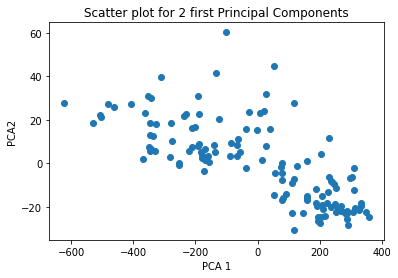

In [182]:
pca_1 = df2.iloc[:, 2]
pca_2 = df2.iloc[:, 1]

plt.scatter(x=pca_1, y=pca_2)

plt.title('Scatter plot for 2 first Principal Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA2')
plt.show()

Είναι πρόδηλο από το προηγούμενο διάγραμμα ότι η διακύμανση στον οριζόντιο άξονα (τιμές από -600 ως 400) είναι πολύ μεγαλύτερη από τη διακύμανση στον κάθετο άξονα (τιμές από -20 ως 60).

<h3><b><i>Συμπληρωματικές Ερωτήσεις</i></b></h3>
<ul>
<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς τη δυνατότητα <i>οπτικοποίησης</i> (<i>visualization</i>) των δεδομένων του dataset;</li>
<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς την ταχύτητα εκπαίδευσης του μοντέλου logistic regression; Να βασίσετε την απάντησή σας στα δύο παρακάτω τμήματα κώδικα.</li>
</ul>

Ο αλγόριθμος PCA μας επιτρέπει να βρούμε τις κύριες συνιστώσες που παρουσιάζεται η μεγαλύτερη διακύμανση στα δεδομένα και ύστερα κρατώντας για παράδειγμα τις 2 πρώτες, μπορούμε να οπτικοποιήσουμε δεδομένα μεγάλων διαστάσεων στο επίπεδο (2 διαστάσεις). Αυτό είναι πολύ χρήσιμο τόσο σε περιπτώσεις επιβλεπόμενης όσο και μη επιβλεπόμενης μάθησης ώστε να μελετήσουμε τη διαχωρισιμότητα των δεδομένων μας με οπτικό τρόπο ή πχ να αξιολογήσουμε τα clusters που προκύπτουν μέσω ενός αλγορίθμου συσταδοποίησης.

Ακόμη, η ταχύτητα εκπαίδευσης του μοντέλου αυξάνεται καθώς μειώνεται ο χώρος των χαρακτηριστικών. Ειδικά σε περιπτώσεις βαθιών νευρωνικών δικτύων με εκατομμύρια ή περισσότερα βάρη, αυτή η μείωση της διαστατικότητας των δεδομένων εισόδων μπορεί να μειώσει τον αριθμό των βαρών (παραμέτρων) του μοντέλου και άρα και το χρόνο εκπαίδευσης του δικτύου σημαντικά.